In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error

In [10]:
# Load the data
Data = pd.read_csv('filtered.csv')

In [11]:
# Select the features and target
selected_features = ['diag', 'pca1', 'pca2', 'pca3']
X = Data[selected_features]
y = Data['energy']

In [12]:
# # Scale the features
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(-1, 0))
# X = scaler.fit_transform(X)

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [14]:
# Define the LGBMRegressor model
lgbm_model = LGBMRegressor()

In [15]:
param_grid = {
    'learning_rate': np.arange(0.01, 0.11, 0.01),
    'n_estimators': [1000, 5000, 10000],
    'num_leaves': np.arange(31, 101, 10),
    'min_child_samples': np.arange(10, 31, 5),
}


In [16]:
# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(estimator=lgbm_model, param_distributions=param_grid, n_iter=100, cv=5, 
                                   scoring='neg_mean_absolute_error', random_state=42)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_iter=100,
                   param_distributions={'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]),
                                        'min_child_samples': array([10, 15, 20, 25, 30]),
                                        'n_estimators': [1000, 5000, 10000],
                                        'num_leaves': array([31, 41, 51, 61, 71, 81, 91])},
                   random_state=42, scoring='neg_mean_absolute_error')

In [17]:
# Print the best parameters and score
print("Best parameters: ", random_search.best_params_)
print("Best MAE score: ", -random_search.best_score_)

Best parameters:  {'num_leaves': 91, 'n_estimators': 10000, 'min_child_samples': 10, 'learning_rate': 0.06999999999999999}
Best MAE score:  0.041672045361735924


In [18]:
# Train the model with the best hyperparameters on the full training set
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

LGBMRegressor(learning_rate=0.06999999999999999, min_child_samples=10,
              n_estimators=10000, num_leaves=91)

In [23]:
y_pred_train = lgbm_model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
print(f"Mean absolute error on training set: {mae_train:.3f}")

NotFittedError: Estimator not fitted, call fit before exploiting the model.

In [22]:
# Evaluate the model on the testing set
y_pred_test = best_model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
print(f"Mean absolute error on testing set: {mae_test:.3f}")


Mean absolute error on testing set: 0.040


NameError: name 'history' is not defined

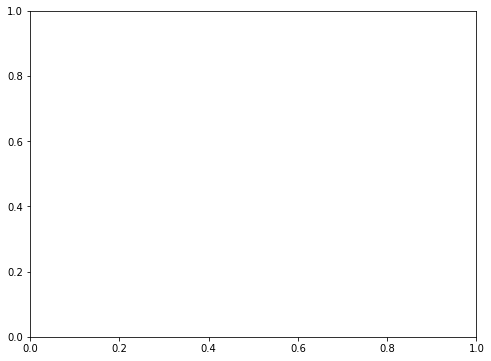

In [21]:
# Plot the MAE training and loss epoch graph
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(history.history['l1'], label='train')
ax.plot(history.history['valid_0']['l1'], label='validation')
ax.set_title('MAE Training and Loss Epoch Graph')
ax.set_xlabel('Epoch')
ax.set_ylabel('MAE')
ax.legend()
plt.show()